In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

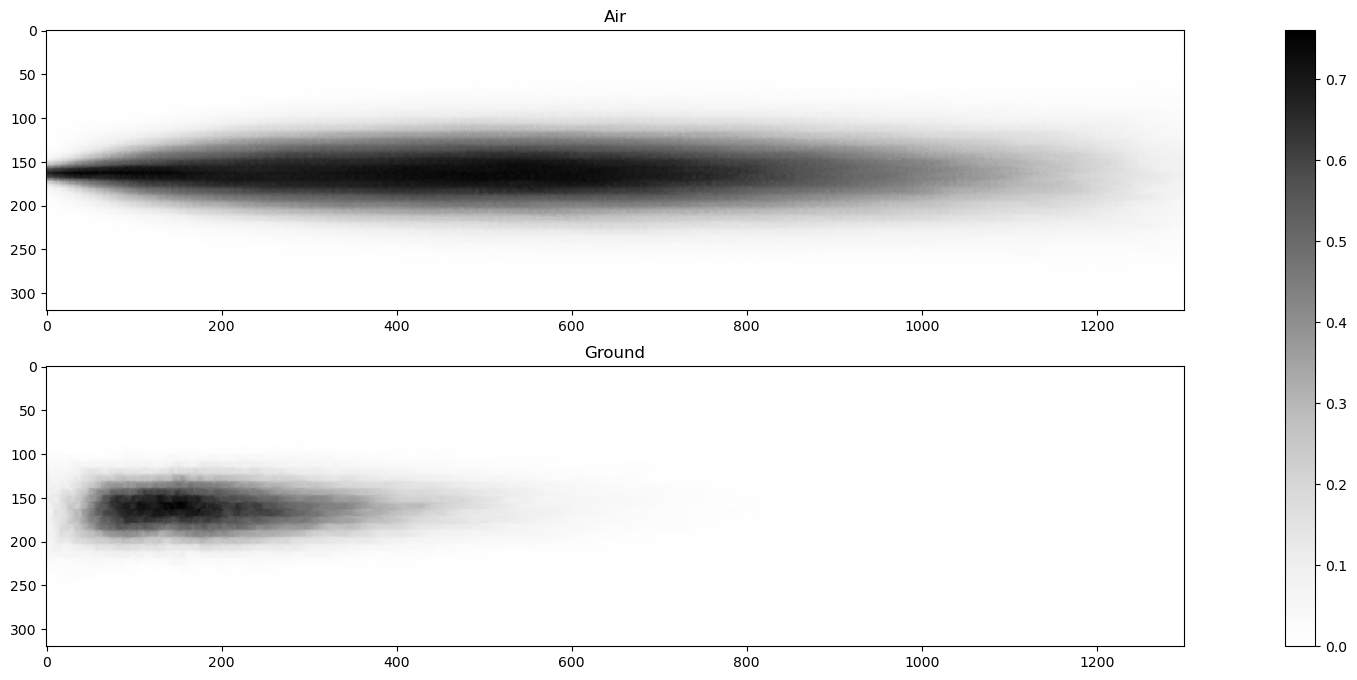

In [2]:
files = [
    'statistics_abs_nose_3e6.dat',
    'statistics_abs_ground_3e6.dat'
]

names = [
    'Air',
    'Ground'
]

fig, axes = plt.subplots(2, 1, figsize=(26,8))
ims = []
np_datasets = []
for i, f in enumerate(files):
    df = pd.read_csv('./Data/' + f, sep=' ', skiprows=[0], names=list(range(320)), index_col=False)
    
    np_data = df.to_numpy()
    np_datasets.append(np_data)

    ims.append(axes[i].imshow(np_data.T, cmap='Greys', interpolation='nearest', vmin=0, vmax=np.max(np_datasets[0])))
    axes[i].set_title(names[i])
    
plt.colorbar(ims[0], ax=axes.ravel().tolist())
# plt.savefig("statistics.jpg")
plt.show()

# Generate video

In [3]:
nose_data = np.load('/storage/rando/data/nose_data.npy')

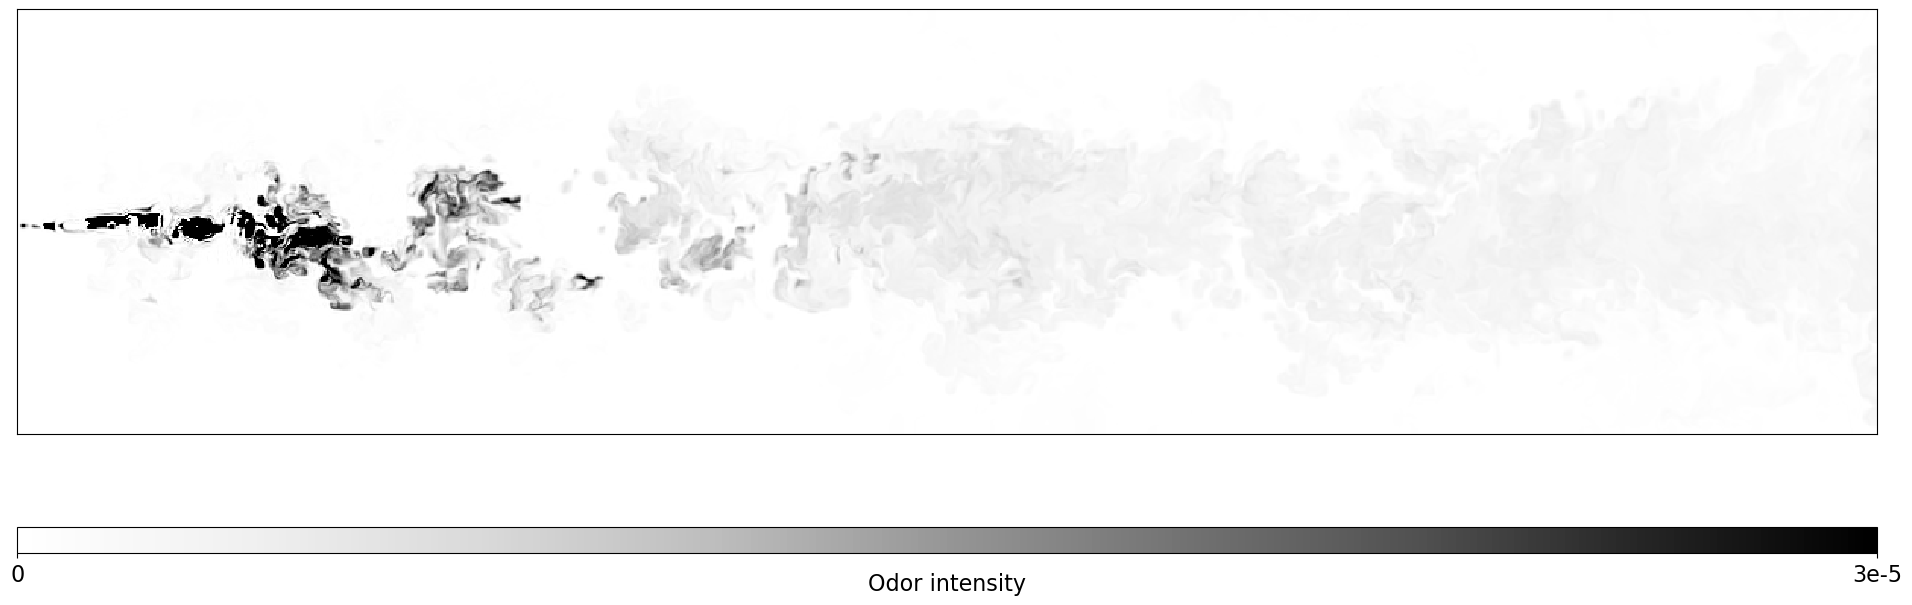

In [15]:
fig = plt.figure( figsize=(24,8) )
im = plt.imshow(nose_data[0], vmin=0, vmax=3e-5, interpolation='none', cmap='Greys')


plt.xticks([])
plt.yticks([])

cbar = plt.colorbar(ticks=[0,3e-5], location='bottom', orientation='horizontal', aspect = 70)
cbar.set_label('Odor intensity', labelpad=-10, fontdict={'size':16})
cbar.ax.set_xticklabels(['0', '3e-5'])
cbar.ax.tick_params(labelsize=16)

In [ ]:
fig = plt.figure( figsize=(24,8) )
im = plt.imshow(nose_data[0], vmin=0, vmax=3e-5, interpolation='none', cmap='Greys')
fps = 60
nSeconds=42

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(nose_data[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim_2.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')